## Homework

In [122]:
from sklearn import linear_model
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

(1) Create a model whatever you like. It may be $y = 3x_1 + 5x_2 + \mu$ or $y = 4x_1 - 3x_2 + 9x_3 + \mu$. Then:
    - (a) generate random 30 observations depend on the model.
    - (b) fit a linear model depends on the observations generated by step (a), and record the coefficients.
    - (c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.
Note that each time the generated observations should come from the sample distribution. If you don not understand, just use the `random.rand` function. 


In [99]:
results = np.zeros([100,3])

for i in range(100):
    ols = linear_model.LinearRegression()
    np.random.seed(i)
    x_train = np.random.rand(30,2)
    y_train = 3 * x_train[:, 0] + 5 * x_train[:, 1] + np.random.randn(30)
    ols.fit(x_train, y_train)
    results[i, 0] = ols.intercept_
    results[i, 1] = ols.coef_[0]
    results[i, 2] = ols.coef_[1]

meanCoef = np.mean(results, axis = 0)
variCoef = np.var(results, axis = 0)

print "-" * 70
print "Mean Coefficients:"
print meanCoef

print "-" * 70
print "Variance of Coefficients:"
print variCoef

----------------------------------------------------------------------
Mean Coefficients:
[ 0.09145288  2.86815602  4.9958323 ]
----------------------------------------------------------------------
Variance of Coefficients:
[ 0.33626955  0.53041927  0.55103371]


(2) This question involves the use of simple linear regression on the Auto data set(In the file "Auto.csv"). Perform a simple linear regression with *mpg* as the response and *horsepower* as the predictor. 
    - (a) What is the coefficient of mpg? How to explain it?
    - (b) What is the determination of the model? How to explain it?
    - (c) Write down the formula of the model.
    - (d) What is the predicted mpg associated with a horsepower of 98?
    - (e) Plot the response and the predictor.  as well as the least squares regression line.
    


392
392
Coefficient for horsepower: -0.158
Intercept of the model: 39.936
Determination of the model: 0.606
Model: MPG = 39.936 + (-0.158) * Horsepower
Estimated MPG for an engine with a horespower of 98: 24.467
----------------------------------------------------------------------


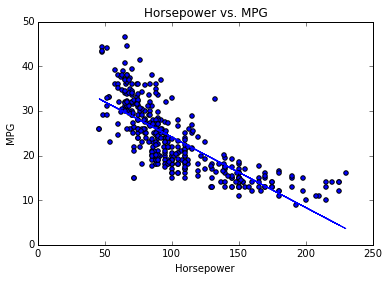

In [151]:
auto = pd.read_csv('Auto.csv')
# auto.head()
# print auto.shape

ols = linear_model.LinearRegression()

x = auto['horsepower'].reshape(392,1)
y = auto['mpg']

ols.fit(x, y)

print "Coefficient for horsepower: %.3f" %ols.coef_[0]
print "Intercept of the model: %.3f" %ols.intercept_
print "Determination of the model: %.3f" %(ols.score(x, y))
print "Model: MPG = %.3f + (%.3f) * Horsepower" %(ols.intercept_, ols.coef_[0])

print "Estimated MPG for an engine with a horespower of 98: %.3f" %ols.predict(98)

print "-" * 70

plt.scatter(x, y)
plt.plot(x, ols.predict(x))
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs. MPG')

(3) Do not use the sklearn library, calculate the coefficients manually by employing the numpy library, as well as the determination and prediction. Note that the results should be exactly the same with the results in question (2).

In [121]:
auto = pd.read_csv('Auto.csv')

x = auto['horsepower']
y = auto['mpg']

x = np.mat(x).reshape(392,1)
y = np.mat(y).T

x = np.column_stack((np.ones([x.shape[0], 1]), x))

coef = (x.T*x).I * x.T * y

# Calculate determination
rss = 0.
tss = 0.

for i in np.arange(y.shape[0]):
    tss = tss + (y[i] - np.mean(y)) ** 2
    rss = rss + (y[i] - (coef[0] + coef[1] * x[i, 1])) ** 2

print "Coefficient for horsepower: %.3f" %coef[1]
print "Intercept of the model: %.3f" %coef[0]
print "Determination of the model: %.3f" %(1 - (rss / tss))
print "Model: MPG = %.3f + (%.3f) * Horsepower" %(coef[0], coef[1])

print "Estimated MPG for an engine with a horespower of 98: %.3f" %(coef[0] + coef[1] * 98)


Coefficient for horsepower: -0.158
Intercept of the model: 39.936
Determination of the model: 0.606
Model: MPG = 39.936 + (-0.158) * Horsepower
Estimated MPG for an engine with a horespower of 98: 24.467


(4) Fit a linear model on a real data set, and try to explain the model. The step is similar to question (2). The data set may come from arbitrarily subject that you are interested. We are happy to see using machine learning algorithms to deal with various of data!

Coefficient for debt service ratio: -1.020
Intercept of the model: 17.115
Determination of the model: 0.063
Model: GDP_DELTA = 17.115 + (-1.020) * DSR
----------------------------------------------------------------------
Quarterly GDP Change as a result of Consumer Debt Service Ratio:
 - Linear regression to determine the effect of the averagem consumer debt service ratio on the quarterly GDP growth rate.
 - Model shows an R-squared value of .06, meaning that the consumer debt service ratio describes only 6% of the variance in quarterly GDP change.
 - This is not an effective model.
 - The model states that a 1% increase in the consumer DSR reduces GDP growth by approximately 1.02%.



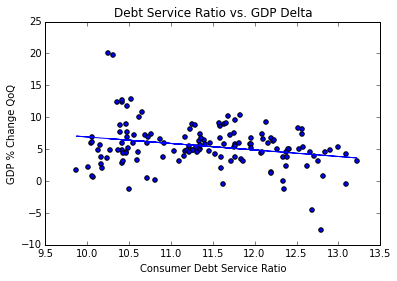

In [164]:
debt = pd.read_table('finobrat.txt') # Ratio of debt service to income for consumers
gdp = pd.read_table('gdpdata.txt') # Real GDP in 2009 chained data

# print debt.head()
# print gdp.head()
# print debt.shape
# print gdp.shape

x = debt['TDSR'].reshape(142, 1)
y = gdp['GDPDELTA']

ols = linear_model.LinearRegression()

ols.fit(x, y)

print "Coefficient for debt service ratio: %.3f" %ols.coef_[0]
print "Intercept of the model: %.3f" %ols.intercept_
print "Determination of the model: %.3f" %(ols.score(x, y))
print "Model: GDP_DELTA = %.3f + (%.3f) * DSR" %(ols.intercept_, ols.coef_[0])

print "-" * 70

plt.scatter(x, y)
plt.plot(x, ols.predict(x))
plt.xlabel('Consumer Debt Service Ratio')
plt.ylabel('GDP % Change QoQ')
plt.title('Debt Service Ratio vs. GDP Delta')

print """Quarterly GDP Change as a result of Consumer Debt Service Ratio:
 - Linear regression to determine the effect of the averagem consumer debt service ratio on the quarterly GDP growth rate.
 - Model shows an R-squared value of .06, meaning that the consumer debt service ratio describes only 6% of the variance in quarterly GDP change.
 - This is not an effective model.
 - The model states that a 1% increase in the consumer DSR reduces GDP growth by approximately 1.02%.
"""

(5) Fit regression models by using the module `Statsmodels` with case2 and case3 in the materials.

In [126]:
auto = pd.read_csv('Auto.csv')

x = auto['horsepower']
x = sm.add_constant(x)
y = auto['mpg']

model = sm.OLS(y, x)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 17 Nov 2015   Prob (F-statistic):           7.03e-81
Time:                        14:23:53   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0